In [2]:
import numpy as np
import cv2 as cv
import time
import matplotlib.pyplot as plt

In [3]:
'''!wget imagen1.png https://github.com/juannieu/VPC1/raw/main/TP6/Rollings.jpg
!wget imagen2.png https://github.com/juannieu/VPC1/raw/main/TP6/baronesa.jpg
!wget imagen3.png https://github.com/juannieu/VPC1/raw/main/TP6/betty.jpg
!wget imagen4.png https://github.com/juannieu/VPC1/raw/main/TP6/bill.jpg
!wget imagen5.png https://github.com/juannieu/VPC1/raw/main/TP6/greta.jpg
!wget imagen6.png https://github.com/juannieu/VPC1/raw/main/TP6/kayla.jpg
!wget imagen7.png https://github.com/juannieu/VPC1/raw/main/TP6/rock.jpg
!wget imagen8.png https://github.com/juannieu/VPC1/raw/main/TP6/dormido.jpg
!wget imagen9.png https://github.com/juannieu/VPC1/raw/main/TP6/dormido2.jpg
!wget imagen10.png https://github.com/juannieu/VPC1/raw/main/TP6/dormido3.jpg
!wget imagen11.png https://github.com/juannieu/VPC1/raw/main/TP6/dormido4.jpg'''
!wget imagen11.png https://github.com/juannieu/VPC1/raw/main/TP6/intro2.mp4

--2022-04-24 00:30:58--  http://imagen11.png/
Resolving imagen11.png (imagen11.png)... failed: Name or service not known.
wget: unable to resolve host address ‘imagen11.png’
--2022-04-24 00:30:58--  https://github.com/juannieu/VPC1/raw/main/TP6/intro.mp4
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juannieu/VPC1/main/TP6/intro.mp4 [following]
--2022-04-24 00:30:58--  https://raw.githubusercontent.com/juannieu/VPC1/main/TP6/intro.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1689150 (1.6M) [application/octet-stream]
Saving to: ‘intro.mp4’

intro.mp4           100%[===================>]  

1. Comenzamos implementando un detector de Haar de Caras

In [4]:
caras=cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
ojos = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

In [5]:
def mostrar(imagen):
  plt.figure()
  plt.imshow(imagen)
  plt.show()

In [6]:
def haar(imagen,output):
  #imagen=cv.imread(nombreImagen)
  imagenEnGris=cv.cvtColor(imagen,cv.COLOR_BGR2GRAY)
  imagenGrisEcualizada=cv.equalizeHist(imagenEnGris)

  carasHaar=caras.detectMultiScale(imagenGrisEcualizada)

  indiceCaras=0
  indiceOjos=0

  for (coordX,coordY,ancho,altura) in carasHaar:
    roiGris = imagenEnGris[coordY:coordY+altura, coordX:coordX+ancho] 
    roiColor = imagen[coordY:coordY+altura, coordX:coordX+ancho] 

    indiceCaras=indiceCaras+1
    ojosDetectados = ojos.detectMultiScale(roiGris, 1.1, 1)

    for losOjos in ojosDetectados:
      indiceOjos=indiceOjos+1
    
    if output==1:
      for (ex,ey,ew,eh) in ojosDetectados:
        cv.rectangle(roiColor,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        mostrar(imagen)
        mostrar(imagenGrisEcualizada)

  return indiceCaras,indiceOjos

Una vez implementados los filtros Haar para detectar a la persona, utilizamos Hough para detectar los iris y determinar si los ojos están abiertos.

In [7]:
def iris(ojosBlur):

  img_iris=imagen_Gris.copy()

  circulos=cv.HoughCircles(ojosBlur,cv.HOUGH_GRADIENT,1,minDist=50,param1=120,param2=25,minRadius=25,maxRadius=45)
  circles = np.uint16(np.around(circulos))

  #Contamos la cantidad de círculos que se dibujan y devolvemos ese valor
  indiceIris=0
  for irisCuenta in circulos:
    indiceIris=indiceIris+1
  
  return indiceIris

Ahora leemos el vídeo y le corremos las funciones

No encuentro caras
No encuentro ojos
Estoy pasando


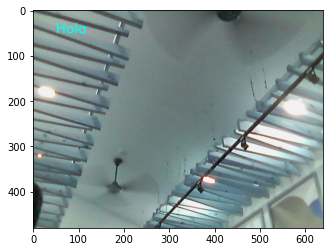

No encuentro caras
No encuentro ojos
Estoy pasando


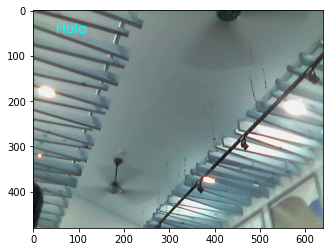

No encuentro caras
No encuentro ojos
Estoy pasando


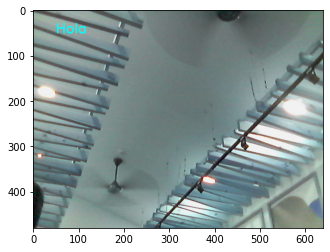

No encuentro caras
No encuentro ojos
Estoy pasando


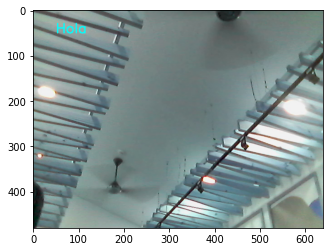

No encuentro ojos
Estoy pasando


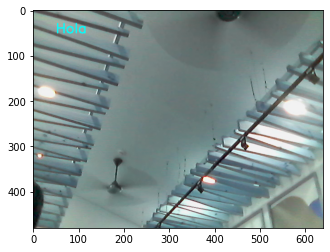

No encuentro caras
No encuentro ojos
Estoy pasando


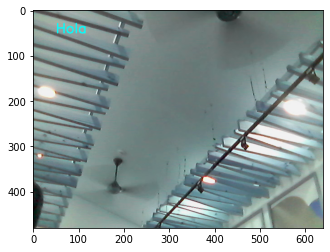

In [ ]:
elVideo=cv.VideoCapture('intro.mp4')
exito,cuadro=elVideo.read()
contadorCuadros=0
tiempoInicial=0
tiempoFinal=0
font = cv.FONT_HERSHEY_SIMPLEX
while exito:
  imagen_Gris=cv.cvtColor(cuadro,cv.COLOR_BGR2GRAY)
  imagen_iris_gris=cv.medianBlur(imagen_Gris,5)
  funcionHaarCaras,funcionHaarOjos=haar(cuadro,0)
  if funcionHaarCaras<1:
      print('No encuentro caras')
  if funcionHaarOjos<1:
      print('No encuentro ojos')
  try:
    funcionIris=iris(cuadro)
    texto='Está despierto'
    while funcionIris<1:
      if tiempoInicial==0:
        tiempoInicial=time.time()
  
  except:
    print('Estoy pasando')
    texto='Está dormido'
    pass

    tiempoFinal=time.time()
  texto='Hola'
  cv.putText(cuadro, 
                texto, 
                (50, 50), 
                font, 1, 
                (0, 255, 255), 
                2, 
                cv.LINE_4)
  #cv.imshow('video', cuadro)
  mostrar(cuadro)
  exito,cuadro=elVideo.read()
  contadorCuadros+=1